## Importing libraries and files

In [6]:
import pandas as pd
from keras.models import load_model
import pickle
import numpy as np
import matplotlib.pyplot as plt

ann_arr = load_model('IP_Arrival_time/Arrival_ANN_1')
ann_end = load_model('IP_End_time/End_ANN_2')
ann_chg = load_model('IP_Change_time/Change_ANN_3')

#Section1
ann1 = load_model('IP_Section_1_new/Section1_ANN_3')
sc1 = pickle.load(open('IP_Section_1_new/Section1_scaler_ANN_3.pkl', 'rb'))
#Section2
ann2 = load_model('IP_Section_2_new/Section2_new_ANN_5')
sc2 = pickle.load(open('IP_Section_2_new/Section2_new_scaler_ANN_5.pkl', 'rb'))
#Section3
ann3 = load_model('IP_Section_3_new/Section3_new_ANN_1')
sc3 = pickle.load(open('IP_Section_3_new/Section3_new_scaler_ANN_1.pkl', 'rb'))
#Section4
ann4 = load_model('IP_Section_4_new/Section4_new_ANN_1')
sc4 = pickle.load(open('IP_Section_4_new/Section4_new_scaler_ANN_1.pkl', 'rb'))
#Section5
ann5 = load_model('IP_Section_5_new/Section5_new_ANN_1')
sc5 = pickle.load(open('IP_Section_5_new/Section5_new_scaler_ANN_1.pkl', 'rb'))
#Section6
ann6 = load_model('IP_Section_6_new/Section6_new_ANN_1')
sc6 = pickle.load(open('IP_Section_6_new/Section6_new_scaler_ANN_1.pkl', 'rb'))

D:\Anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at you

## Input details

In [41]:
charge_mass = 16.2
standoff_distance = 11.49
start_time = 0
termination_time = 60
interval = 0.01

## Pressure Profile

In [42]:
arr = np.array ([[charge_mass,standoff_distance]])

arrival_time = ann_arr.predict(arr)
end_time = ann_end.predict(arr)
change_time = ann_chg.predict(arr)
print ("end", end_time, "change", change_time)

def stable_state(start, end, interval):    
    t = np.arange(start, end + interval, interval)
    t = t.reshape(len(t),1)

    p = np.repeat(0, len(t)).reshape(len(t),1)
    
    values = np.concatenate ((t, p), axis = 1)
    return values

def p_fluctuation(standoff_distance, d_set):
    if 1.5 <= standoff_distance <= 3:
        d_set[:,0:3] = sc1.transform(d_set[:,0:3])
        p_f = ann1.predict(d_set)
        section = 1
        
    elif 3 < standoff_distance <= 7:
        d_set[:,0:3] = sc2.transform(d_set[:,0:3])
        p_f = ann2.predict(d_set)
        section = 2
        
    elif 7 < standoff_distance <= 13:
        d_set[:,0:3] = sc3.transform(d_set[:,0:3])
        p_f = ann3.predict(d_set)
        section = 3
        
    elif 13 < standoff_distance <= 19:
        d_set[:,0:3] = sc4.transform(d_set[:,0:3])
        p_f = ann4.predict(d_set)
        section = 4
        
    elif 19 < standoff_distance <= 25:
        d_set[:,0:3] = sc5.transform(d_set[:,0:3])
        p_f = ann5.predict(d_set)
        section = 5
        
    elif 25 < standoff_distance <= 30:
        d_set[:,0:3] = sc6.transform(d_set[:,0:3])
        p_f = ann6.predict(d_set)
        section = 6
        
    else:
        print ("Out of trained range")
    return p_f, section

if termination_time < arrival_time:
    start = start_time
    end = termination_time
    values1 = stable_state(start, end, interval)
    arrival_time = 0
    end_time = 0

else:
    start = start_time
    end = arrival_time
    values1 = stable_state(start, end, interval)
    
    if termination_time < end_time:
        end_time = termination_time
        
    else:
        start = end_time
        end = termination_time
        values3 = stable_state(start, end, interval)

t2= np.arange(arrival_time, end_time + interval, interval)
t2 = t2.reshape(len(t2),1)

if t2[0] < change_time:
    ph2 = np.array([[0, 1]])
else:
    ph2 = np.array([[1, 0]])
    
positive = np.array([0, 1])
negative = np.array([1, 0])

for time in t2[1:]:
    if time < change_time:
        ph2=np.vstack((ph2,positive))
    else:
        ph2=np.vstack((ph2,negative))
        
m2 = np.repeat(charge_mass, len(t2)).reshape(len(t2),1)
d2 = np.repeat(standoff_distance, len(t2)).reshape(len(t2),1)
d_set = np.concatenate ((m2, d2, t2, ph2), axis = 1)

p2, section = p_fluctuation(standoff_distance, d_set)
p2 = p2.reshape((-1, 1))
values2 = np.concatenate ((t2, p2), axis = 1)


if 'values2' in globals():
    ml_model = np.concatenate((values1, values2), axis=0)
    if 'values3' in globals():
        ml_model = np.concatenate((ml_model, values3), axis=0)
else:
    ml_model = values1
print (section)

X1 = ml_model[:,0]
y1 = ml_model[:,1]

1/1 [==============================] - 0s 35ms/step
end [[58.46649]] change [[27.127625]]
119/119 [==============================] - 0s 2ms/step
3


In [43]:
file_path = 'G:/Chamodi/Machine_Learning/Pressure_history_2/Heat_maps/Distance_model/NumResults_11.4m16.2kg/10_new'
#lsdyna = pd.read_excel(file_path)
lsdyna = pd.read_csv(file_path, delimiter="\s+", skiprows = 8, skipfooter = 1, header = None, names = ["Time", "Pressure"])
X2_original = lsdyna['Time']
y2_original = lsdyna['Pressure']
X2_original=X2_original*1000
y2_original=(y2_original/1000)-101.25

# Find the indices for the two values closest to value1 and value2
index1 = (np.abs(X2_original - start_time)).argmin()
index2 = (np.abs(X2_original - termination_time)).argmin()

# Extract the ranges from X2 and y2 based on the indices
X2 = X2_original[index1:index2+1]
y2 = y2_original[index1:index2+1]

X2 = X2.to_numpy()
y2 = y2.to_numpy()

print("Numerical length",len(y2), "ANN-based length", len(y1))

Numerical length 6001 ANN-based length 6005


C:\Users\z5379606\AppData\Local\Temp\ipykernel_22764\4154423938.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  lsdyna = pd.read_csv(file_path, delimiter="\s+", skiprows = 8, skipfooter = 1, header = None, names = ["Time", "Pressure"])


In [ ]:
X1=X1[:-2]
y1=y1[:-2]
print("ANN:",len(X1),"Num:",len(X2))
print("ANN:",len(y1),"Num:",len(y2))

In [ ]:
# Numerical
max_index_num = np.argmax(y2)
min_index_num = np.argmin(y2)

zero_crossing_index = next((i for i, val in enumerate(y2[max_index_num:min_index_num], start=0) if val <= 0), None)+max_index_num

change_time_num = X2[zero_crossing_index]

#end_index_num = min(range(min_index_num, len(y2)), key=lambda j: abs(y2[j]))
#end_index_num = next((i for i, val in enumerate(y2[min_index_num:], start=0) if val > 0), None)+min_index_num
for k in range(len(y2) - 1, -1, -1):
    if y2[k] < -1:
        end_index_num = k
        break
print(end_time_num)

end_time_num = X2[end_index_num]

positive_duration_num = change_time_num - X2[max_index_num]
negative_duration_num = end_time_num - change_time_num


positive_peak_pressure_num = y2[max_index_num]
negative_peak_pressure_num = y2[min_index_num]

positive_peak_time_num = X2[max_index_num]
negative_peak_time_num = X2[min_index_num]

# ANN-based
positive_duration_ann = float(change_time - arrival_time)
negative_duration_ann = float(end_time - change_time)

max_index_ann = np.argmax(p2)
min_index_ann = np.argmin(p2)

positive_peak_pressure_ann = float(p2[max_index_ann])
negative_peak_pressure_ann = float(p2[min_index_ann])

positive_peak_time_ann = float(t2[max_index_ann])
negative_peak_time_ann = float(t2[min_index_ann])

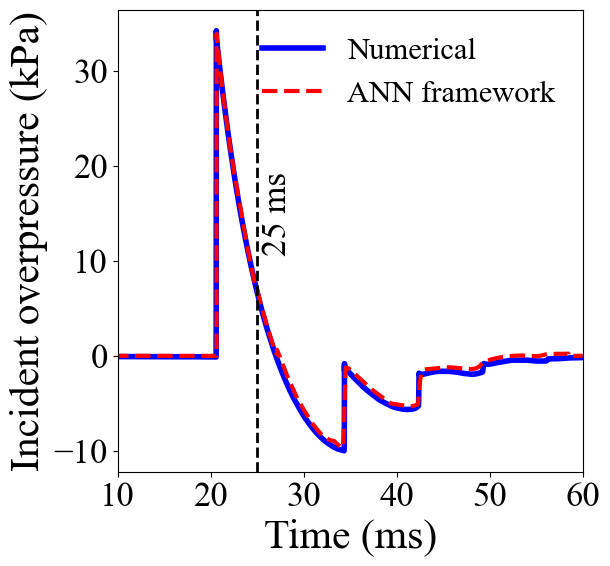

In [46]:
plt.figure(figsize=(6,6))
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(X2, y2, color = 'blue',label = 'Numerical', linewidth=4)
plt.plot(X1, y1, linestyle = 'dashed', color = 'red', label = 'ANN framework', linewidth=3)
plt.ylabel('Incident overpressure (kPa)',fontsize = 30)
plt.xlabel('Time (ms)',fontsize = 30)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc='upper right', ncol=1, frameon = False, fontsize = 22)
plt.axvline(x=25, color='black', linestyle='--', linewidth=2, label='28 ms')
plt.text(25.5, 15, '25 ms', rotation=90, verticalalignment='center', horizontalalignment='left', fontsize=25, color='black')

# Create the annotation text
#annotation_text = (f'Peak incident overpressure\n\nANN framework - {round(max(y1), 2)} kPa\n'
#                   f'Numerical - {round(max(y2), 2)} kPa')

#plt.annotate(annotation_text,xy=(0.4,0.5), xycoords='figure fraction', fontsize=18)

plt.xlim (10,termination_time)
plt.savefig(f'Heat_maps/Distance_model/{standoff_distance}m{charge_mass}kg_new.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Define the lag range
lag_range = 50

# Compute full cross-correlation
cross_corr_full = np.correlate(y2, y1, mode='full')

# Find the middle index (corresponds to zero lag)
mid_idx = len(y2) - 1

# Extract the cross-correlation only within the desired lag range (-50 to 50)
cross_corr_limited = cross_corr_full[mid_idx - lag_range: mid_idx + lag_range + 1]

# Normalize the cross-correlation coefficient
norm_cross_corr = cross_corr_limited / (np.std(y2) * np.std(y1) * len(y2))

# Define the lags between -50 and 50
lags = np.arange(-lag_range, lag_range + 1)

# Find the lag that gives the maximum correlation within the restricted range
max_corr_lag = lags[np.argmax(np.abs(norm_cross_corr))]

#Plot the cross-correlation for the limited range
'''plt.plot(lags, norm_cross_corr)
plt.axvline(0, color='black', linestyle='--', label="Zero lag")
plt.axvline(max_corr_lag, color='red', linestyle='--', label=f"Max Corr Lag = {max_corr_lag}")
plt.xlabel('Lag')
plt.ylabel('Cross-correlation coefficient')
plt.title('Cross-Correlation between Numerical Model and ANN Prediction')
plt.legend()
plt.show()'''

# Check the correlation at zero lag
zero_lag_corr = norm_cross_corr[lag_range]
print(f"Cross-correlation coefficient at zero lag: {zero_lag_corr}")
print(f"Max cross-correlation coefficient lag: {max_corr_lag}")

In [ ]:
# Initialize PrettyTable
table = PrettyTable()

# Define columns
table.field_names = ["Parameter", "Numerical model prediction", "ANN-based framework prediction", "% error"]

# Calculate percentage errors
def per_error(true_value, predicted_value):
    return abs(predicted_value - true_value) / abs(true_value) * 100

# Add rows
table.add_row(["Peak positive overpressure", f"{positive_peak_pressure_num:.2f}", f"{positive_peak_pressure_ann:.2f}", f"{per_error(positive_peak_pressure_num, positive_peak_pressure_ann):.2f}%"])
table.add_row(["Peak negative overpressure", f"{negative_peak_pressure_num:.2f}", f"{negative_peak_pressure_ann:.2f}", f"{per_error(negative_peak_pressure_num, negative_peak_pressure_ann):.2f}%"])
table.add_row(["Peak positive time", f"{positive_peak_time_num:.2f}", f"{positive_peak_time_ann:.2f}", f"{per_error(positive_peak_time_num, positive_peak_time_ann):.2f}%"])
table.add_row(["Peak negative time", f"{negative_peak_time_num:.2f}", f"{negative_peak_time_ann:.2f}", f"{per_error(negative_peak_time_num, negative_peak_time_ann):.2f}%"])
table.add_row(["Positive duration", f"{positive_duration_num:.2f}", f"{positive_duration_ann:.2f}", f"{per_error(positive_duration_num, positive_duration_ann):.2f}%"])
#table.add_row(["Negative duration", f"{negative_duration_num:.2f}", f"{negative_duration_ann:.2f}", f"{per_error(negative_duration_num, negative_duration_ann):.2f}%"])
table.add_row(["Cross correlation coefficient", "-", f"{zero_lag_corr:.3f}", "-"])

# Convert PrettyTable to string
table_str = table.get_string()

# Set up Matplotlib figure and axes
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Use the table_str as the plot text
ax.text(0.5, 0.5, table_str, fontsize=12, ha="center", va="center", family="monospace")

# Save the table as an image
plt.savefig(f'IP_Num&ANN_Comparison/Images2/Section{section}/table_{standoff_distance}m{charge_mass}kg.png', bbox_inches='tight', dpi=150)

# Show the plot (optional)
plt.show()